We know that data collection and preparation plays a vital role in Machine Learning. So, let us begin data collection and preparation.

Data Collection & Preparation

We know that understanding the data, gaining insights such as how data is spread, how features are related, etc... has considerable impact on the model's performance. So, let us begin with Data Visualization, and Exploratory Data Analysis(EDA) using pandas and matplotlib.

In [1]:
#importing necessary packages
import pandas as pd #EDA
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
#load the dataset
df = pd.read_csv(r"C:\Users\vijayakumar_p\Desktop\adult\Dataset.data", header=None, delim_whitespace=True, na_values = '?') #reading space-separated dataset which doesn't have header, and replacing missing values being represented as "?" with NaN
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] #naming header appropriately referring to the dataset documentation
df.head() #lists top 5 rows of data, while df.tail() lists bottom 5 rows of data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape #dataset size

(48842, 15)

Let us now look for missing or NaN values.

In [4]:
df.isnull().values.any()

True

It's always good pratice to know the datatype of the columns/features. As it's not only missing that hurt us, but also inconsistent datatype of the data in a column.

In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Training over same data points leads to over-fitting, that's why it's good to delete duplicates.

In [6]:
duplicate_rows_df = df[df.duplicated()] #checks for duplicates
duplicate_rows_df.shape #number of duplicate rows

(52, 15)

In [7]:
df = df.drop_duplicates() #deleting duplicate rows

In [8]:
df.isnull().sum() #returns column-wise sum of NaN/missing vales

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

Feature Selection

Here, columns are nothing but features. Large number of features also may lead to over-fitting, to avoid this we use dimensionality reduction techniques such as PCA, multidimensional scaling, high correlation filter, etc...Choosing features wisely after statistically understanding the data helps in better model's performance.

Now, let us eliminate some correlated data such as education and education-num.

In [9]:
df = df[["age", "workclass", "fnlwgt", "educational-num", "marital-status", "occupation", "capital-gain", "capital-loss", "hours-per-week", "income"]]
df.isnull().sum() #checking if there are still missing values

age                   0
workclass          2795
fnlwgt                0
educational-num       0
marital-status        0
occupation         2805
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

In [10]:
df = df.dropna() #delete missing/NaN data to not take any chance
df.isnull().sum() #confirming if no missing values exist

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

In [11]:
df.shape #dataset size after some data preprocessing

(45985, 10)

We know that our aim is to predict income range which is binary classification problem. So, according let us do certain replacements in the 'income' column.

In [12]:
df['income'] = df['income'].replace(['<=50K','>50K'],[0,1]) #replaces all '<=50K' and '>50K' entries in 'income' column with 0 and 1, respectively
df.head() #view data after changes

,age,workclass,fnlwgt,educational-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,0,0,40,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,0,0,50,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,0,0,40,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,7688,0,40,1
5,34,Private,198693,6,Never-married,Other-service,0,0,30,0


Let us now visualize the data to get better insights

Knowing Outliers

Box plot is good way to visually check for outliers. Later these may be removed using IQR score technique, if found.

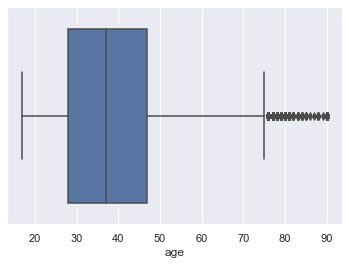

In [28]:
sns.boxplot(x=df['age']) #replace age with other features to check outliers in respective feature

Text(0.5, 0, 'Workclass')

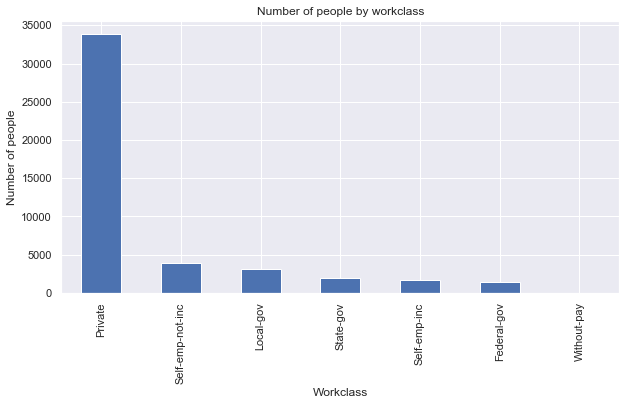

In [29]:
#histogram to understand frequency of occurence
df.workclass.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of people by workclass')
plt.ylabel('Number of people')
plt.xlabel('Workclass') #similarly one may check with occupation, and others

Understanding correlation

We use scallter plot to understand correlation between two features.

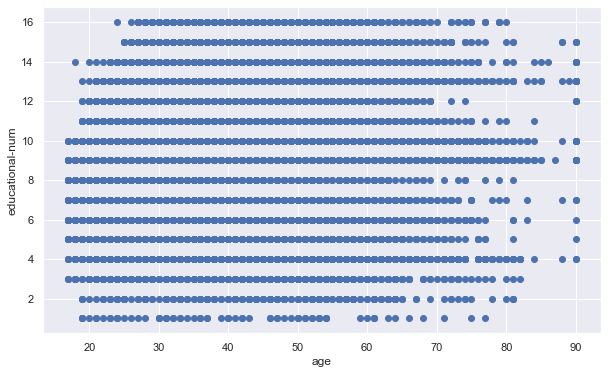

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['age'], df['educational-num'])
ax.set_xlabel('age')
ax.set_ylabel('educational-num')
plt.show()

Understanding features dependency and relationships

We use heat maps to understand dependencies and realtionships.

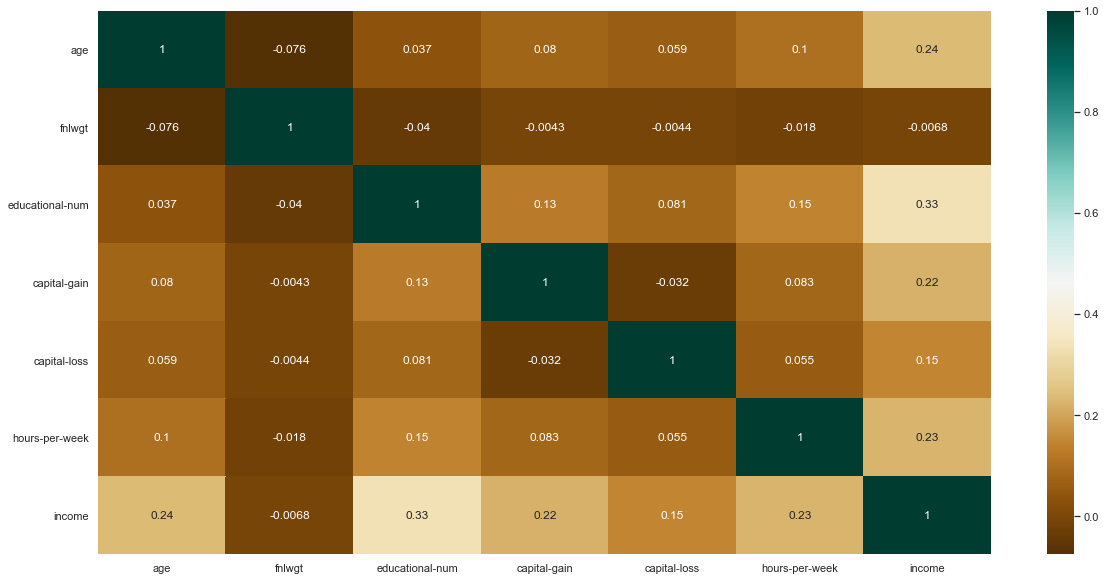

In [31]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Binning: Dummies help us to deal with non-numeric data. Here, '0' represents 'false', while '1' represents 'true'.

In [32]:
df = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation'])

In [33]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Data preparation for training and testing

We use sklearn library for splitting data into training and testing data.

In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('income', axis=1), df['income'], test_size=0.25, random_state=42)

In [35]:
test_x.shape

(11497, 34)

ML Model Building

We train with 3 algorithms/models and compare the performance to choose the better one.
We will use Logistic Regression, Decision Trees, and Random Forests.

In [36]:
#importing necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings #to get rid of warnings
warnings.simplefilter("ignore")

In [37]:
#table to keep track of performance of each model
table=pd.DataFrame(columns=["Model","Accuracy","ROC AUC"])
def record(model_name,accuracy,RA):
    global table
    table=table.append(pd.DataFrame([[model_name,accuracy,RA]],columns=["Model","Accuracy","ROC AUC"]))
    table.reset_index(drop=True,inplace=True)

In [38]:
#we use grid search for hyperparameters tuning

alg_count=0
while alg_count<3:
    if alg_count == 0:
        parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],"penalty":["l1","l2"]}
        alg = LogisticRegression(multi_class="auto",random_state=13)
        model_name = "Logistic Regression"
        model =  GridSearchCV(alg, parameters, cv=3)
    elif alg_count == 1:
        parameters = {"max_depth": [2,3,4,5,6,7,8]}
        alg = DecisionTreeClassifier(random_state=13)
        model_name = "Decision Trees"
        model =  GridSearchCV(alg, parameters, cv=3)
    elif alg_count == 2:
        parameters = {"n_estimators": [50, 100, 200, 400, 800]}
        alg = RandomForestClassifier(random_state=13)
        model_name = "Random Forests"
        model =  GridSearchCV(alg, parameters, cv=3)
    model.fit(train_x, train_y)
    predicted = model.predict(test_x)
    accuracy = model.score(test_x, test_y)
    print("Model: ", model_name)
    print("Accuracy = ", accuracy)
    probabilities = model.predict_proba(test_x)
    RA = roc_auc_score(test_y, probabilities[:, 1])
    print("ROC AUC Score = ", RA)
    print("Confusion Matrix = ", confusion_matrix(test_y, predicted))
    train_predictions = model.predict(train_x)
    print("Best Estimator: ", "{}\n".format(model.best_estimator_))
    print("Best Hyper-parameters: ", model.best_params_)
    print("\n\n")
    record(model_name,accuracy,RA)
    alg_count+=1

Model:  Logistic Regression
Accuracy =  0.7916847873358267
ROC AUC Score =  0.5623935278588312
Confusion Matrix =  [[8380  322]
 [2073  722]]
Best Estimator:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Best Hyper-parameters:  {'C': 0.01, 'penalty': 'l2'}



Model:  Decision Trees
Accuracy =  0.8553535704966513
ROC AUC Score =  0.8994420093010097
Confusion Matrix =  [[8217  485]
 [1178 1617]]
Best Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
               

In [39]:
table.head()

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.791685,0.562394
1,Decision Trees,0.855354,0.899442
2,Random Forests,0.846134,0.899250


Visualize Models' Performances

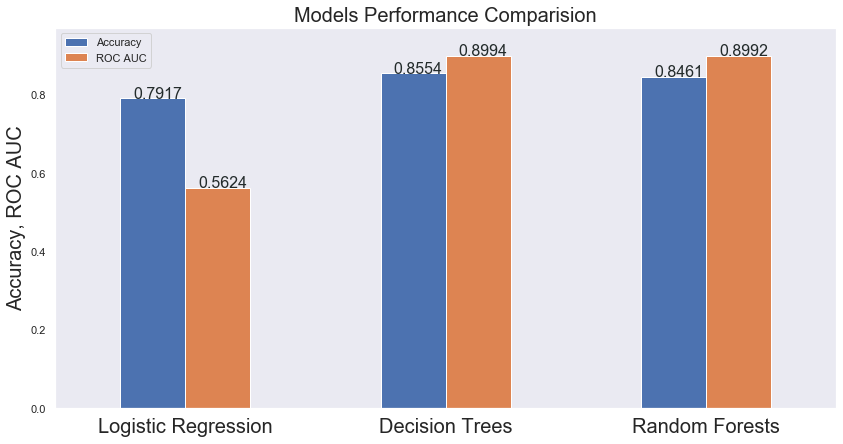

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
ax=table.plot(x="Model", y=["Accuracy","ROC AUC"], kind="bar", figsize=(14,7), legend=True)
ax.grid(False)
plt.title("Models Performance Comparision", fontsize = 20)
plt.xlabel("")
plt.xticks(rotation='horizontal',fontsize = 20)
plt.margins(x=0, y=0.08)
plt.ylabel("Accuracy, ROC AUC", fontsize = 20)
for i in ax.patches:
    value=round(i.get_height(),4)
    ax.text(x=i.get_x()+0.05, y=i.get_height(), s=str(value), fontsize=16, color="#232b2b")

One may infer that Decision Trees work better with this, and move with this algorithm to fine tune its performance as revisiting data, hyperparameters tuning, etc... Also, one may check with other algorithms as well, such as Linear SVM, Gaussian Naive Bayes, Adaptive Boosting using:
from sklearn.svm import LinearSVC ,
from sklearn.naive_bayes import GaussianNB ,
from sklearn.ensemble import AdaBoostClassifier , respectively.

Please check my blogs:
https://medium.com/@_vp